## Setup

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

from sklearn.decomposition import PCA

In [2]:
sns.set()

## balanced 3x20, fc2

In [3]:
source = './tcav_results/balanced-100_3x20/cavs'
num_cavs = 25

cavs = []
for i in range(num_cavs):
    path = source + '/blue-not_blue_' + str(i) + '-fc2_relu-linear-0.1.pkl'
    with open(path, 'rb') as f:
        data = pickle.load(f)
        cavs.append(data['cavs'][0])
cavs = np.array(cavs).reshape((num_cavs, -1))

In [4]:
data

{'concepts': ['blue', 'not_blue_24'],
 'bottleneck': 'fc2_relu',
 'hparams': HParams([('alpha', 0.1), ('model_type', 'linear')]),
 'accuracies': {'blue': 1.0,
  'not_blue_24': 0.9393939393939394,
  'overall': 0.9696969696969697},
 'cavs': [array([ 0.56488337,  0.50768794, -0.04716235,  0.0817183 , -0.37167191,
          0.296341  , -0.20950386,  0.32743747, -0.88136892,  0.34350423,
          0.22641251, -0.20760087, -0.54257291, -0.82347632, -0.10911674,
         -0.13423536, -1.11836316, -0.20733685,  0.74169122, -0.43678373]),
  array([-0.56488337, -0.50768794,  0.04716235, -0.0817183 ,  0.37167191,
         -0.296341  ,  0.20950386, -0.32743747,  0.88136892, -0.34350423,
         -0.22641251,  0.20760087,  0.54257291,  0.82347632,  0.10911674,
          0.13423536,  1.11836316,  0.20733685, -0.74169122,  0.43678373])],
 'saved_path': 'tcav_results/balanced-100_3x20/cavs/blue-not_blue_24-fc2_relu-linear-0.1.pkl'}

In [3]:
cavs.shape

(25, 20)

In [4]:
mean_cav = cavs.mean(axis=0)
print("average CAV")
print(mean_cav)

average CAV
[ 0.344349    0.30230269 -0.0787265   0.10012259 -0.32084549  0.22974159
 -0.15175802  0.26472037 -0.7281026   0.19264859  0.11621408 -0.30907185
 -0.35593536 -0.70643636 -0.01375555 -0.03738973 -0.82057432 -0.27840322
  0.48726611 -0.39752283]


In [5]:
pca = PCA()
pca.fit(cavs)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
singular_values_balanced3x20_fc2 = pca.singular_values_
print("singular values:")
singular_values_balanced3x20_fc2

singular values:


array([1.72419065, 1.17380908, 0.89412349, 0.64275886, 0.47818447,
       0.25130807, 0.18537688, 0.14418846, 0.09510954, 0.06657584,
       0.05620881, 0.04783248, 0.03981934, 0.02517333, 0.01952457,
       0.01801265, 0.01234181, 0.01045309, 0.00704628, 0.00486855])

In [7]:
# shape: (n_components, n_features)
components = pca.components_
print("principal components:")
components.shape

principal components:


(20, 20)

In [8]:
explained_variance_balanced3x20_fc2 = pca.explained_variance_ratio_
print("explained variance ratio")
print("{:.1f}% of the total variance is explained by the first component\n".format(100*explained_variance_balanced3x20_fc2[0]))
explained_variance_balanced3x20_fc2

explained variance ratio
50.1% of the total variance is explained by the first component



array([5.01117036e-01, 2.32254171e-01, 1.34760806e-01, 6.96409583e-02,
       3.85442440e-02, 1.06458778e-02, 5.79268247e-03, 3.50452840e-03,
       1.52481350e-03, 7.47139748e-04, 5.32570867e-04, 3.85668738e-04,
       2.67274021e-04, 1.06819309e-04, 6.42586417e-05, 5.46920043e-05,
       2.56759445e-05, 1.84186424e-05, 8.36927613e-06, 3.99547384e-06])

In [9]:
print("first principal component")
components[0,:]

first principal component


array([ 0.26751178,  0.20546972,  0.00359541,  0.04726872, -0.19885581,
        0.10697356, -0.14895224,  0.16986846, -0.41331602,  0.11807906,
        0.06776036, -0.10808666, -0.18575213, -0.36953994, -0.06457818,
       -0.0403658 , -0.4825021 , -0.08377707,  0.31205704, -0.25850825])

In [12]:
weighted_avg_component = np.matmul(singular_values_balanced3x20_fc2 / sum(singular_values_balanced3x20_fc2), components)
print("weighted average of principal components")
weighted_avg_component

weighted average of principal components


array([ 0.17339593,  0.09592419,  0.06385238, -0.03605119, -0.04826622,
       -0.02217643, -0.0817523 ,  0.03796925, -0.07936741,  0.1066575 ,
        0.04823196,  0.08429366, -0.08994128, -0.00650436, -0.10932992,
       -0.06673914, -0.16535766,  0.10216522,  0.14665425, -0.06384835])

## blue 3x20, fc2

In [13]:
source = './tcav_results/blue2-100_3x20/cavs'
num_cavs = 25

cavs = []
for i in range(num_cavs):
    path = source + '/blue-not_blue_' + str(i) + '-fc2_relu-linear-0.1.pkl'
    with open(path, 'rb') as f:
        data = pickle.load(f)
        cavs.append(data['cavs'][0])
cavs = np.array(cavs).reshape((num_cavs, -1))

In [14]:
cavs.shape

(25, 20)

In [15]:
mean_cav = cavs.mean(axis=0)
print("average CAV")
mean_cav

average CAV


array([ 0.        , -0.01028122, -0.41807324,  0.25389871,  0.09259489,
       -0.26955684, -0.34073803,  0.22316338, -0.30103159,  0.09841387,
       -0.45947057,  0.11039459,  0.01105305,  0.21602617, -0.08064095,
        0.02324397,  0.32226614, -0.23212242, -0.20512506, -0.02124688])

In [16]:
pca = PCA()
pca.fit(cavs)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
singular_values_blue3x20_fc2 = pca.singular_values_
print("singular values:")
singular_values_blue3x20_fc2

singular values:


array([ 1.38456056,  0.63417447,  0.58573068,  0.5277693 ,  0.25323544,
        0.22105677,  0.12675308,  0.1024551 ,  0.09829408,  0.06903579,
        0.0516907 ,  0.04217925,  0.03700905,  0.02914512,  0.01916204,
        0.01435028,  0.01168941,  0.01015042,  0.00646524, -0.        ])

In [18]:
# shape: (n_components, n_features)
components = pca.components_
print("principal components:")
components.shape

principal components:


(20, 20)

In [19]:
explained_variance_blue3x20_fc2 = pca.explained_variance_ratio_
print("explained variance ratio")
print("{:.1f}% of the total variance is explained by the first component\n".format(100*explained_variance_blue3x20_fc2[0]))
explained_variance_blue3x20_fc2

explained variance ratio
61.8% of the total variance is explained by the first component



array([6.17927983e-01, 1.29637743e-01, 1.10588481e-01, 8.97846735e-02,
       2.06710684e-02, 1.57514879e-02, 5.17882203e-03, 3.38361608e-03,
       3.11435927e-03, 1.53625212e-03, 8.61268999e-04, 5.73471372e-04,
       4.41499053e-04, 2.73807623e-04, 1.18358004e-04, 6.63796172e-05,
       4.40452395e-05, 3.32110249e-05, 1.34735956e-05, 0.00000000e+00])

In [20]:
print("first principal component")
components[0,:]

first principal component


array([-0.        ,  0.00870545,  0.51726144, -0.19648717, -0.09713438,
        0.18778225,  0.39492557, -0.26334597,  0.24183058, -0.2923064 ,
        0.31859124, -0.05246964, -0.04692712, -0.26515304,  0.0374543 ,
        0.06029455, -0.24766083,  0.11671228,  0.12417367, -0.0874142 ])

In [21]:
weighted_avg_component = np.matmul(singular_values_blue3x20_fc2 / sum(singular_values_blue3x20_fc2), components)
print("weighted average of principal components")
weighted_avg_component

weighted average of principal components


array([ 0.        ,  0.02626035,  0.16567832, -0.09166782,  0.03655415,
       -0.00327287,  0.18694751, -0.07981452,  0.13997817, -0.01545383,
        0.08288144, -0.12020836, -0.08681162, -0.1123223 , -0.00986534,
       -0.08170739, -0.10430208,  0.0953546 ,  0.02571293,  0.07669167])

## scree plot

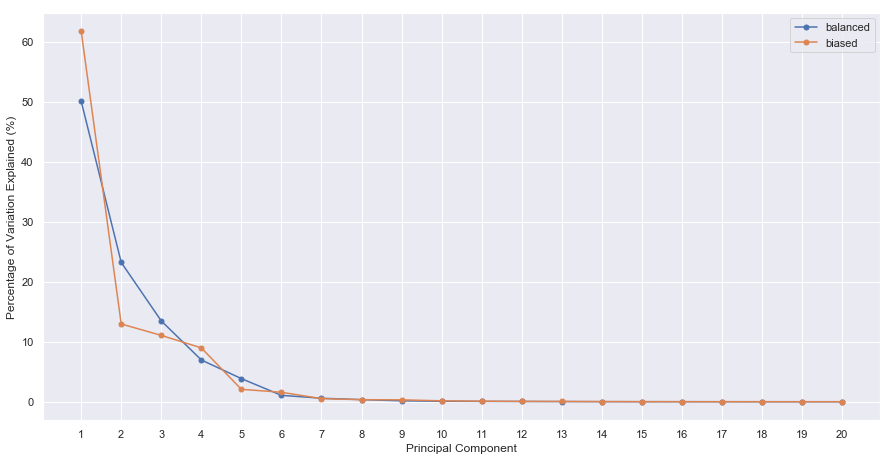

In [47]:
fig = plt.figure(figsize=(15,7.5))

x = np.arange(1,21)
plt.plot(x, 100*explained_variance_balanced3x20_fc2, marker='.', markersize=10)
plt.plot(x, 100*explained_variance_blue3x20_fc2, marker='.', markersize=10)
plt.xticks(x)
plt.legend(['balanced', 'biased'])

plt.xlabel("Principal Component")
plt.ylabel("Percentage of Variation Explained (%)")

plt.show()